# **1. Perkenalan Dataset**

**Nama Siswa:** Eidelwise Prily Safana

**Dataset:** Pima Indians Diabetes Database

**Sumber:** UCI Machine Learning Repository / Kaggle

**Deskripsi:** Dataset ini berisi data medis dari wanita suku Pima Indian berusia minimal 21 tahun. Dataset digunakan untuk memprediksi apakah seseorang menderita diabetes berdasarkan berbagai pengukuran diagnostik.

**Fitur Dataset:**
- Pregnancies: Jumlah kehamilan
- Glucose: Konsentrasi glukosa plasma 2 jam dalam tes toleransi glukosa oral
- BloodPressure: Tekanan darah diastolik (mm Hg)
- SkinThickness: Ketebalan lipatan kulit triceps (mm)
- Insulin: Insulin serum 2 jam (mu U/ml)
- BMI: Indeks massa tubuh (berat dalam kg/(tinggi dalam m)^2)
- DiabetesPedigreeFunction: Fungsi silsilah diabetes
- Age: Usia (tahun)
- Outcome: Variabel target (0 = tidak diabetes, 1 = diabetes)

Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [4]:
# Import Library yang Dibutuhkan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    classification_report, confusion_matrix, accuracy_score,
    precision_score, recall_score, f1_score, roc_auc_score, roc_curve
)
import warnings
warnings.filterwarnings('ignore')

# Set style untuk visualisasi
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")

print("Semua library berhasil diimport!")
print(f"Pandas version: {pd.__version__}")
print(f"NumPy version: {np.__version__}")

Semua library berhasil diimport!
Pandas version: 2.2.2
NumPy version: 2.0.2


# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [5]:
# Memuat Dataset Diabetes
df = pd.read_csv('/content/diabetes.csv')

# Menampilkan informasi dasar dataset
print("=" * 60)
print("INFORMASI DATASET DIABETES")
print("=" * 60)
print(f"\nShape dataset: {df.shape}")
print(f"Jumlah baris: {df.shape[0]}")
print(f"Jumlah kolom: {df.shape[1]}")

print("\n" + "=" * 60)
print("5 BARIS PERTAMA DATASET")
print("=" * 60)
df.head(10)

INFORMASI DATASET DIABETES

Shape dataset: (714, 9)
Jumlah baris: 714
Jumlah kolom: 9

5 BARIS PERTAMA DATASET


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [6]:
# =====================================================
# EXPLORATORY DATA ANALYSIS (EDA)
# =====================================================

# 1. Informasi Tipe Data
print("=" * 60)
print("INFORMASI TIPE DATA")
print("=" * 60)
print(df.info())

# 2. Statistik Deskriptif
print("\n" + "=" * 60)
print("STATISTIK DESKRIPTIF")
print("=" * 60)
print(df.describe().T)

# 3. Cek Missing Values
print("\n" + "=" * 60)
print("MISSING VALUES")
print("=" * 60)
missing = df.isnull().sum()
print(missing)
print(f"\nTotal missing values: {missing.sum()}")

# 4. Cek Duplikat
print("\n" + "=" * 60)
print("DATA DUPLIKAT")
print("=" * 60)
duplicates = df.duplicated().sum()
print(f"Jumlah data duplikat: {duplicates}")

# 5. Distribusi Target Variable
print("\n" + "=" * 60)
print("DISTRIBUSI TARGET (Outcome)")
print("=" * 60)
print(df['Outcome'].value_counts())
print(f"\nPersentase:")
print(df['Outcome'].value_counts(normalize=True) * 100)

INFORMASI TIPE DATA
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 714 entries, 0 to 713
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               714 non-null    int64  
 1   Glucose                   714 non-null    int64  
 2   BloodPressure             714 non-null    int64  
 3   SkinThickness             714 non-null    int64  
 4   Insulin                   714 non-null    int64  
 5   BMI                       714 non-null    float64
 6   DiabetesPedigreeFunction  714 non-null    float64
 7   Age                       714 non-null    int64  
 8   Outcome                   714 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 50.3 KB
None

STATISTIK DESKRIPTIF
                          count        mean         std     min     25%  \
Pregnancies               714.0    3.813725    3.364326   0.000   1.000   
Glucose                   714.0  120.868347

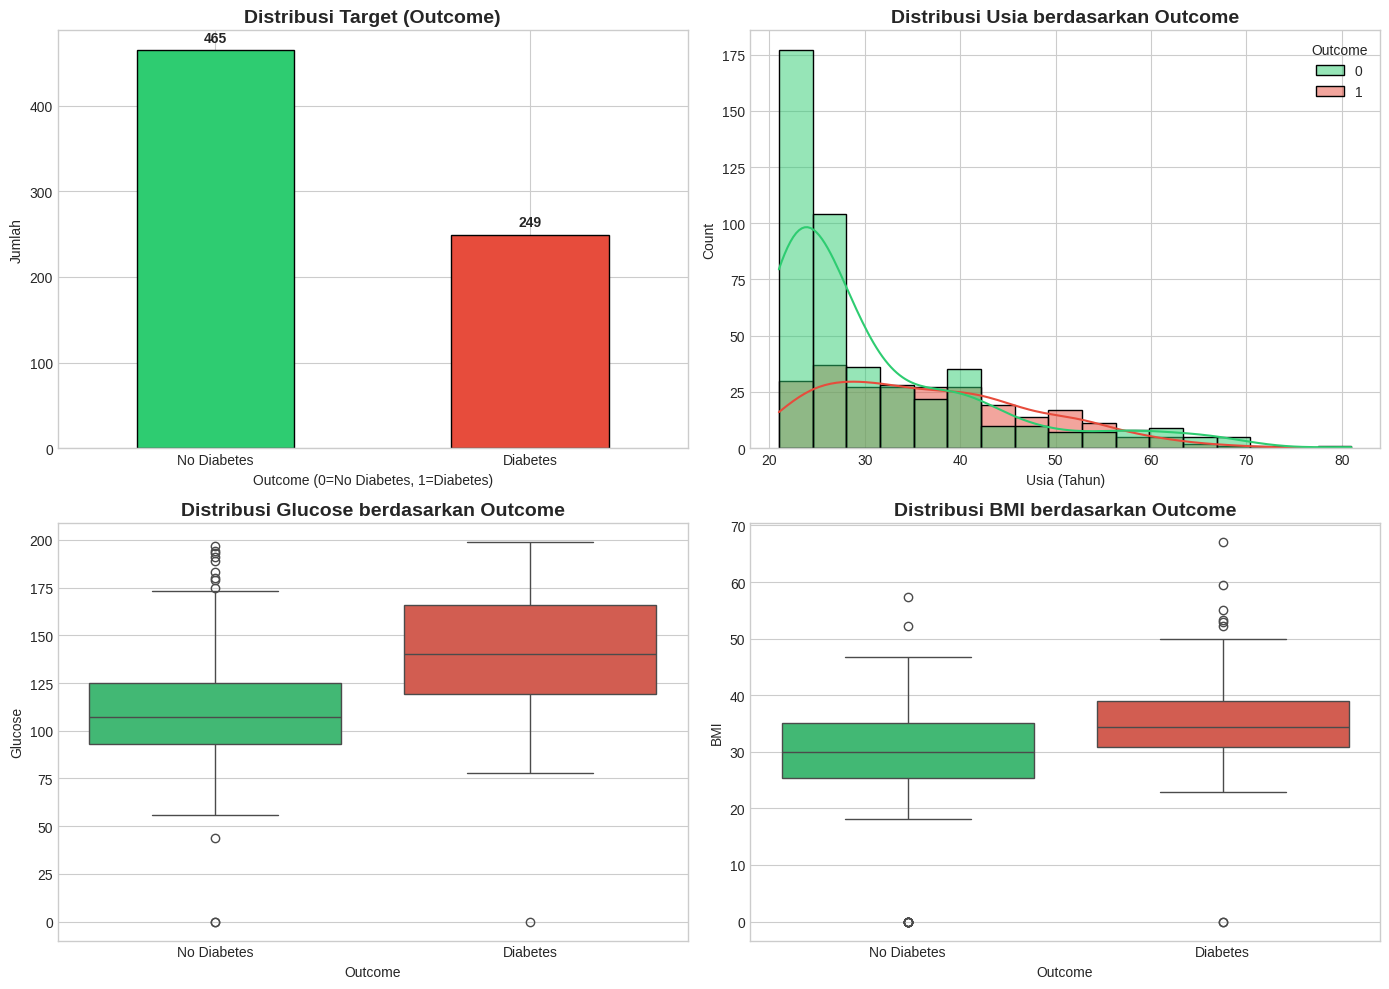

Visualisasi EDA berhasil disimpan sebagai 'eda_visualisasi.png'


In [7]:
# =====================================================
# VISUALISASI EDA
# =====================================================

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Distribusi Target
ax1 = axes[0, 0]
colors = ['#2ecc71', '#e74c3c']
df['Outcome'].value_counts().plot(kind='bar', ax=ax1, color=colors, edgecolor='black')
ax1.set_title('Distribusi Target (Outcome)', fontsize=14, fontweight='bold')
ax1.set_xlabel('Outcome (0=No Diabetes, 1=Diabetes)')
ax1.set_ylabel('Jumlah')
ax1.set_xticklabels(['No Diabetes', 'Diabetes'], rotation=0)
for i, v in enumerate(df['Outcome'].value_counts()):
    ax1.text(i, v + 10, str(v), ha='center', fontweight='bold')

# 2. Distribusi Usia
ax2 = axes[0, 1]
sns.histplot(data=df, x='Age', hue='Outcome', kde=True, ax=ax2, palette=colors)
ax2.set_title('Distribusi Usia berdasarkan Outcome', fontsize=14, fontweight='bold')
ax2.set_xlabel('Usia (Tahun)')

# 3. Distribusi Glucose
ax3 = axes[1, 0]
sns.boxplot(data=df, x='Outcome', y='Glucose', ax=ax3, palette=colors)
ax3.set_title('Distribusi Glucose berdasarkan Outcome', fontsize=14, fontweight='bold')
ax3.set_xticklabels(['No Diabetes', 'Diabetes'])

# 4. Distribusi BMI
ax4 = axes[1, 1]
sns.boxplot(data=df, x='Outcome', y='BMI', ax=ax4, palette=colors)
ax4.set_title('Distribusi BMI berdasarkan Outcome', fontsize=14, fontweight='bold')
ax4.set_xticklabels(['No Diabetes', 'Diabetes'])

plt.tight_layout()
plt.savefig('eda_visualisasi.png', dpi=150, bbox_inches='tight')
plt.show()

print("Visualisasi EDA berhasil disimpan sebagai 'eda_visualisasi.png'")

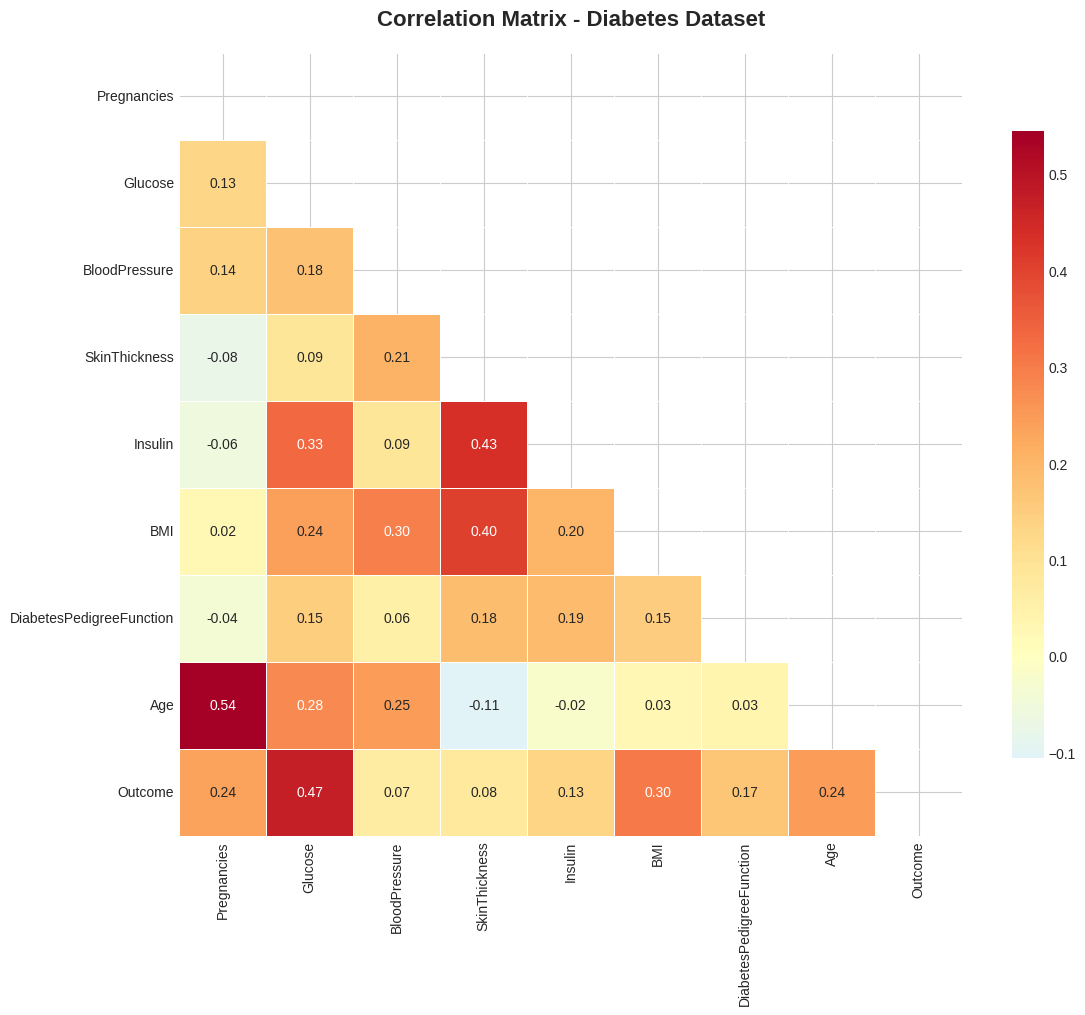


Korelasi dengan Target (Outcome):
Outcome                     1.000000
Glucose                     0.473722
BMI                         0.304183
Age                         0.243795
Pregnancies                 0.236352
DiabetesPedigreeFunction    0.169319
Insulin                     0.134912
SkinThickness               0.077926
BloodPressure               0.065234
Name: Outcome, dtype: float64


In [8]:
# =====================================================
# CORRELATION MATRIX & HEATMAP
# =====================================================

plt.figure(figsize=(12, 10))
correlation_matrix = df.corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, annot=True, fmt='.2f',
            cmap='RdYlBu_r', center=0, linewidths=0.5,
            square=True, cbar_kws={'shrink': 0.8})
plt.title('Correlation Matrix - Diabetes Dataset', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.savefig('correlation_matrix.png', dpi=150, bbox_inches='tight')
plt.show()

print("\nKorelasi dengan Target (Outcome):")
print(correlation_matrix['Outcome'].sort_values(ascending=False))

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [9]:
# =====================================================
# DATA PREPROCESSING
# =====================================================

# 1. Membuat copy dataframe untuk preprocessing
df_processed = df.copy()

# 2. Menangani nilai 0 yang seharusnya missing (pada kolom tertentu)
# Kolom yang tidak mungkin bernilai 0: Glucose, BloodPressure, SkinThickness, Insulin, BMI
zero_cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

print("=" * 60)
print("PENANGANAN NILAI 0 (MISSING VALUES)")
print("=" * 60)

for col in zero_cols:
    zero_count = (df_processed[col] == 0).sum()
    print(f"{col}: {zero_count} nilai 0 ({zero_count/len(df_processed)*100:.2f}%)")
    # Replace 0 dengan median
    if zero_count > 0:
        median_val = df_processed[df_processed[col] != 0][col].median()
        df_processed[col] = df_processed[col].replace(0, median_val)
        print(f"  -> Diganti dengan median: {median_val:.2f}")

print("\n" + "=" * 60)
print("SETELAH PENANGANAN MISSING VALUES")
print("=" * 60)
print(df_processed.describe().T)

PENANGANAN NILAI 0 (MISSING VALUES)
Glucose: 3 nilai 0 (0.42%)
  -> Diganti dengan median: 117.00
BloodPressure: 31 nilai 0 (4.34%)
  -> Diganti dengan median: 72.00
SkinThickness: 210 nilai 0 (29.41%)
  -> Diganti dengan median: 29.00
Insulin: 347 nilai 0 (48.60%)
  -> Diganti dengan median: 126.00
BMI: 11 nilai 0 (1.54%)
  -> Diganti dengan median: 32.00

SETELAH PENANGANAN MISSING VALUES
                          count        mean        std     min      25%  \
Pregnancies               714.0    3.813725   3.364326   0.000    1.000   
Glucose                   714.0  121.359944  30.362894  44.000   99.000   
BloodPressure             714.0   72.301120  12.189726  24.000   64.000   
SkinThickness             714.0   29.184874   8.888084   7.000   25.000   
Insulin                   714.0  141.925770  87.615114  14.000  125.000   
BMI                       714.0   32.458683   6.918541  18.200   27.600   
DiabetesPedigreeFunction  714.0    0.474448   0.334359   0.078    0.244   
Age   

DETEKSI OUTLIER (IQR Method)
Pregnancies: 4 outliers (Range: -6.50 - 13.50)
Glucose: 0 outliers (Range: 37.50 - 201.50)
BloodPressure: 13 outliers (Range: 40.00 - 104.00)
SkinThickness: 82 outliers (Range: 14.50 - 42.50)
Insulin: 331 outliers (Range: 117.88 - 136.88)
BMI: 8 outliers (Range: 14.10 - 50.10)
DiabetesPedigreeFunction: 28 outliers (Range: -0.33 - 1.21)
Age: 14 outliers (Range: 0.00 - 64.00)


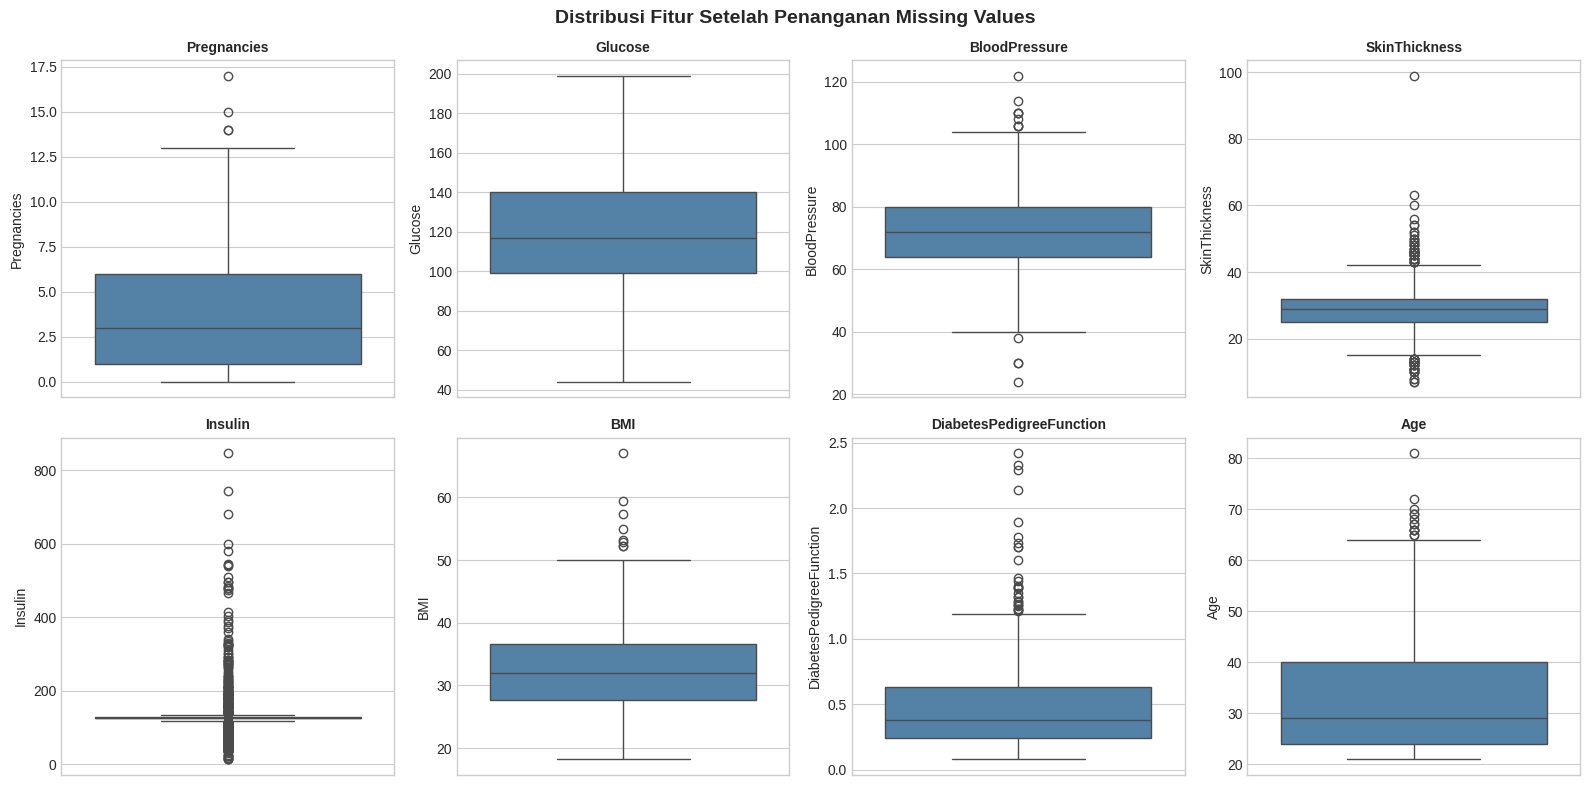

In [10]:
# =====================================================
# DETEKSI DAN PENANGANAN OUTLIER
# =====================================================

def detect_outliers_iqr(data, column):
    """Deteksi outlier menggunakan metode IQR"""
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return len(outliers), lower_bound, upper_bound

print("=" * 60)
print("DETEKSI OUTLIER (IQR Method)")
print("=" * 60)

feature_cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
                'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

for col in feature_cols:
    count, lower, upper = detect_outliers_iqr(df_processed, col)
    print(f"{col}: {count} outliers (Range: {lower:.2f} - {upper:.2f})")

# Visualisasi Boxplot sebelum dan sesudah
fig, axes = plt.subplots(2, 4, figsize=(16, 8))
axes = axes.flatten()

for i, col in enumerate(feature_cols):
    sns.boxplot(data=df_processed, y=col, ax=axes[i], color='steelblue')
    axes[i].set_title(f'{col}', fontsize=10, fontweight='bold')

plt.suptitle('Distribusi Fitur Setelah Penanganan Missing Values', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig('boxplot_features.png', dpi=150, bbox_inches='tight')
plt.show()

STANDARISASI FITUR

Statistik setelah standarisasi:
                                  mean       std       min       max
Pregnancies              -7.712474e-17  1.000701 -1.134373  3.922188
Glucose                   2.338621e-16  1.000701 -2.549631  2.558863
BloodPressure            -3.483053e-16  1.000701 -3.965223  4.079970
SkinThickness             8.956421e-17  1.000701 -2.497774  7.860420
Insulin                   7.463684e-18  1.000701 -1.461111  8.041624
BMI                      -1.691768e-16  1.000701 -2.062383  5.010536
DiabetesPedigreeFunction  1.890800e-16  1.000701 -1.186528  5.822835
Age                      -2.587411e-16  1.000701 -1.033860  4.091177


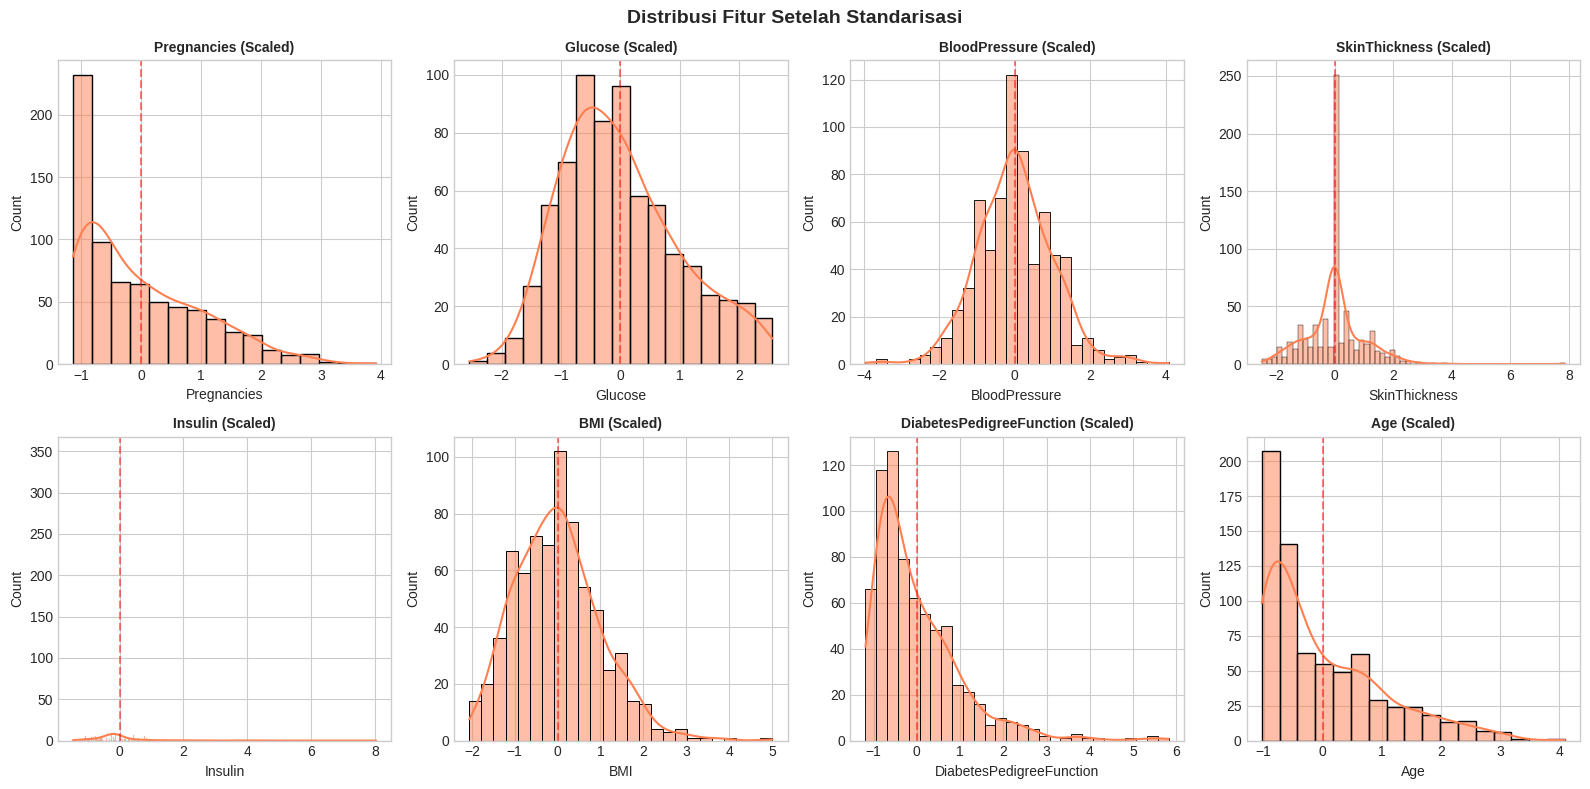

In [11]:
# =====================================================
# NORMALISASI/STANDARISASI FITUR
# =====================================================

# Pisahkan fitur dan target
X = df_processed.drop('Outcome', axis=1)
y = df_processed['Outcome']

# Standarisasi fitur menggunakan StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

print("=" * 60)
print("STANDARISASI FITUR")
print("=" * 60)
print("\nStatistik setelah standarisasi:")
print(X_scaled_df.describe().T[['mean', 'std', 'min', 'max']])

# Visualisasi distribusi setelah standarisasi
fig, axes = plt.subplots(2, 4, figsize=(16, 8))
axes = axes.flatten()

for i, col in enumerate(X_scaled_df.columns):
    sns.histplot(data=X_scaled_df, x=col, kde=True, ax=axes[i], color='coral')
    axes[i].set_title(f'{col} (Scaled)', fontsize=10, fontweight='bold')
    axes[i].axvline(x=0, color='red', linestyle='--', alpha=0.5)

plt.suptitle('Distribusi Fitur Setelah Standarisasi', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig('scaled_features.png', dpi=150, bbox_inches='tight')
plt.show()

In [12]:
# =====================================================
# SPLIT DATA TRAIN & TEST
# =====================================================

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

print("=" * 60)
print("SPLIT DATA TRAIN & TEST")
print("=" * 60)
print(f"\nData Training: {X_train.shape[0]} samples ({X_train.shape[0]/len(X)*100:.1f}%)")
print(f"Data Testing: {X_test.shape[0]} samples ({X_test.shape[0]/len(X)*100:.1f}%)")

print("\nDistribusi Target pada Data Training:")
print(pd.Series(y_train).value_counts())

print("\nDistribusi Target pada Data Testing:")
print(pd.Series(y_test).value_counts())

SPLIT DATA TRAIN & TEST

Data Training: 571 samples (80.0%)
Data Testing: 143 samples (20.0%)

Distribusi Target pada Data Training:
Outcome
0    372
1    199
Name: count, dtype: int64

Distribusi Target pada Data Testing:
Outcome
0    93
1    50
Name: count, dtype: int64


In [13]:
# =====================================================
# SIMPAN DATA HASIL PREPROCESSING
# =====================================================

# Gabungkan kembali fitur dan target
df_final = pd.DataFrame(X_scaled, columns=X.columns)
df_final['Outcome'] = y.values

# Simpan ke file CSV
df_final.to_csv('diabetes_preprocessing.csv', index=False)

print("=" * 60)
print("DATA BERHASIL DISIMPAN")
print("=" * 60)
print(f"\nFile: diabetes_preprocessing.csv")
print(f"Shape: {df_final.shape}")
print(f"\nPreview data yang disimpan:")
df_final.head()

DATA BERHASIL DISIMPAN

File: diabetes_preprocessing.csv
Shape: (714, 9)

Preview data yang disimpan:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.650296,0.878004,-0.024720,0.654720,-0.181897,0.165081,0.456572,1.443241,1
1,-0.836928,-1.198352,-0.517283,-0.020815,-0.181897,-0.847403,-0.369468,-0.179687,0
2,1.245185,2.031535,-0.681471,-0.020815,-0.181897,-1.324716,0.591252,-0.094270,1
3,-0.836928,-1.066520,-0.517283,-0.696349,-0.547387,-0.630442,-0.920161,-1.033860,0
4,-1.134373,0.515465,-2.651722,0.654720,0.297808,1.539165,5.427772,-0.008853,1
